<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Using-the-Iris-data-set" data-toc-modified-id="Using-the-Iris-data-set-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Using the Iris data set</a></span><ul class="toc-item"><li><span><a href="#K-Means" data-toc-modified-id="K-Means-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>K-Means</a></span><ul class="toc-item"><li><span><a href="#Optimal-Number-of-Clusters" data-toc-modified-id="Optimal-Number-of-Clusters-1.1.1"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Optimal Number of Clusters</a></span></li></ul></li><li><span><a href="#Gaussian-Mixture-Model" data-toc-modified-id="Gaussian-Mixture-Model-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Gaussian Mixture Model</a></span><ul class="toc-item"><li><span><a href="#Optimal-number-of-components:" data-toc-modified-id="Optimal-number-of-components:-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Optimal number of components:</a></span></li></ul></li><li><span><a href="#K-means--Vs-Gaussian-Mixture-Model" data-toc-modified-id="K-means--Vs-Gaussian-Mixture-Model-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>K-means  Vs Gaussian Mixture Model</a></span><ul class="toc-item"><li><span><a href="#K-means-Evaluation" data-toc-modified-id="K-means-Evaluation-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>K-means Evaluation</a></span></li><li><span><a href="#Gaussian-Mixture-Model-Evaluation" data-toc-modified-id="Gaussian-Mixture-Model-Evaluation-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Gaussian Mixture Model Evaluation</a></span></li></ul></li></ul></li><li><span><a href="#Using-a-sample-of-Bitbrains-workload-data-set" data-toc-modified-id="Using-a-sample-of-Bitbrains-workload-data-set-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Using a sample of Bitbrains workload data set</a></span></li></ul></div>

# Using the Iris data set

## K-Means

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
iris = datasets.load_iris()

In [3]:
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [4]:
iris_df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
40,5.0,3.5,1.3,0.3
30,4.8,3.1,1.6,0.2
72,6.3,2.5,4.9,1.5
149,5.9,3.0,5.1,1.8
0,5.1,3.5,1.4,0.2


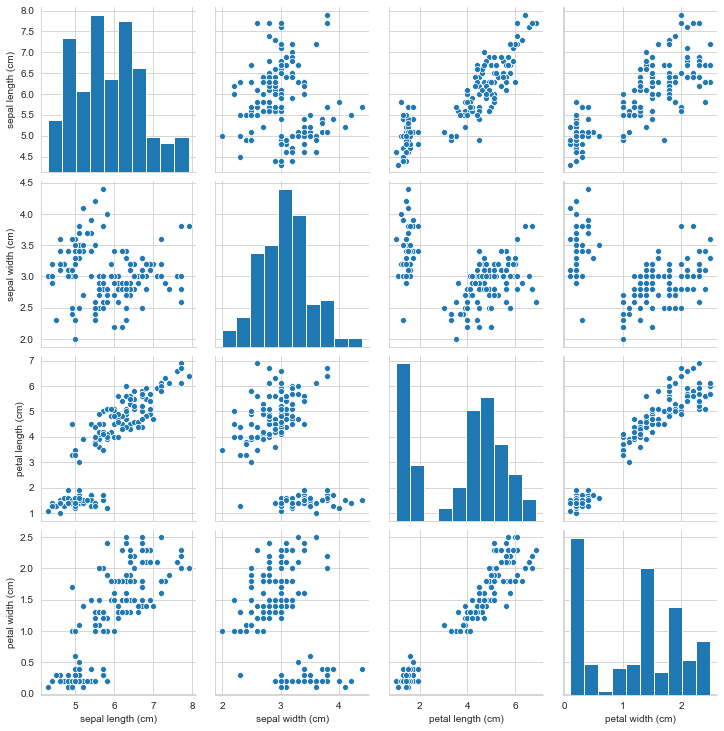

In [5]:
# Scatter Plot and Histogram 
sns.pairplot(iris_df);

### Optimal Number of Clusters

Optimal Number of Clusters: The Elbow method is a technique for finding number of clusters, k. In the plot of
within-cluster SSE for different number of clusters, k is that value beyond which the distortions begin to approach
a constant value. In scikit-learn, SSE is obtained by the inertia attribute of the KMeans model.

Source: [Clustering Cloud Workloads: K-Means vs Gaussian Mixture Model](https://www.sciencedirect.com/science/article/pii/S1877050920309820) & [Elbow Method](https://www.scikit-yb.org/en/latest/api/cluster/elbow.html)

In [6]:
Kiris_df = iris_df.copy()

C:\Users\Student\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


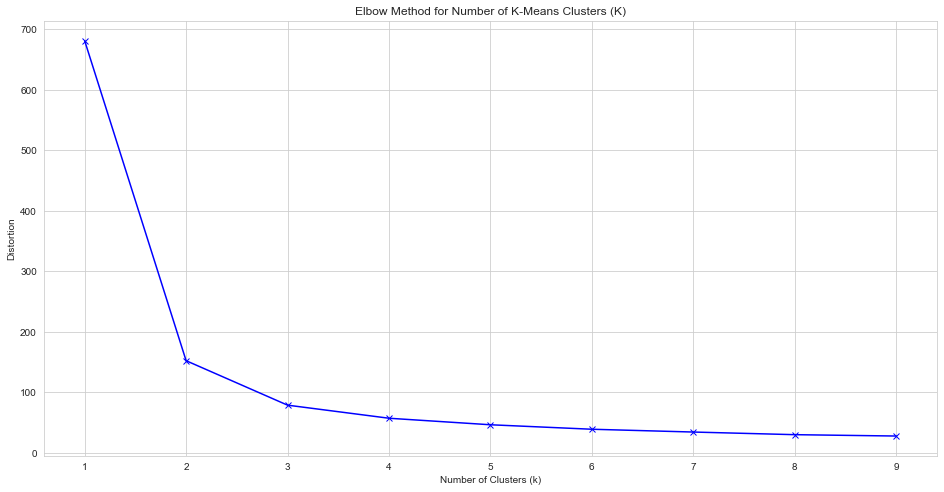

In [7]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(Kiris_df)
    distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method for Number of K-Means Clusters (K)')
plt.show()

The location of elbow is by number 3, indicating the optimal number of clusters, which is 3.

In [8]:
kmeanModel = KMeans(n_clusters=3)
kmeanModel.fit(Kiris_df)

KMeans(n_clusters=3)

In [9]:
Kiris_df['k_means']=kmeanModel.predict(Kiris_df)
Kiris_df['target']=iris['target']

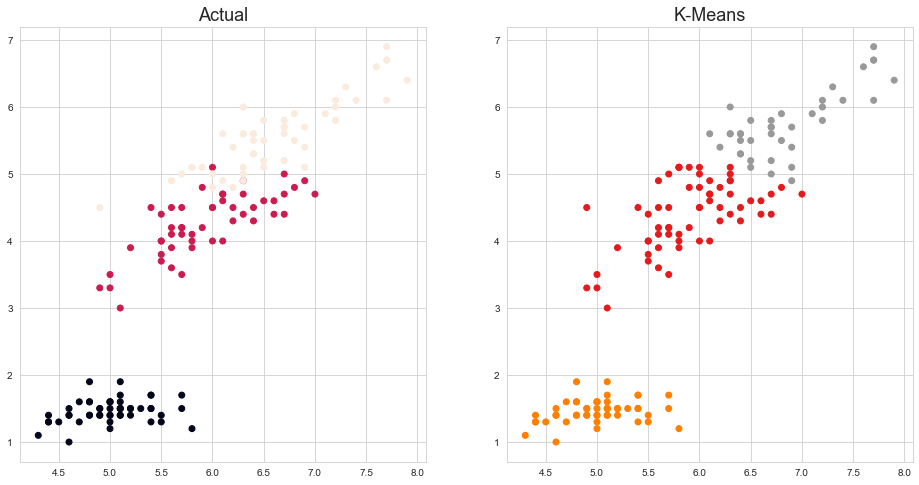

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(Kiris_df['sepal length (cm)'], Kiris_df['petal length (cm)'], c=Kiris_df['target'])
axes[1].scatter(Kiris_df['sepal length (cm)'], Kiris_df['petal length (cm)'], c=Kiris_df['k_means'], cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K-Means', fontsize=18);
#axes[0].legend();
#axes[1].legend();

The plot above indicates K-means clustering algorithm fairly fits the data well

In [11]:
kmeanModel.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

## Gaussian Mixture Model

### Optimal number of components: 

Optimal number of Components: GMM is a generative model that gives a probability distribution for the data set.
An optimal number of components avoids overfitting or underfitting and can be determined by evaluating the model
likelihood using cross-validation or analytic criterion. The Akaike Information Criterion (AIC) and the Bayesian
Information criterion (BIC) are analytic methods that estimate the goodness-of-fit of statistical models relative to each
other for a given data set. They provide a quantitative measure of how general the model is, in terms of accuracy of
representing future data using the process that generated the current data. AIC and BIC use a penalty for overfitting
and under-fitting and this value is larger for BIC than that by AIC

Source: [Clustering Cloud Workloads: K-Means vs Gaussian Mixture Model](https://www.sciencedirect.com/science/article/pii/S1877050920309820) 

In [12]:
GMMiris_df = iris_df.copy()

C:\Users\Student\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Student\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Student\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Student\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Wi

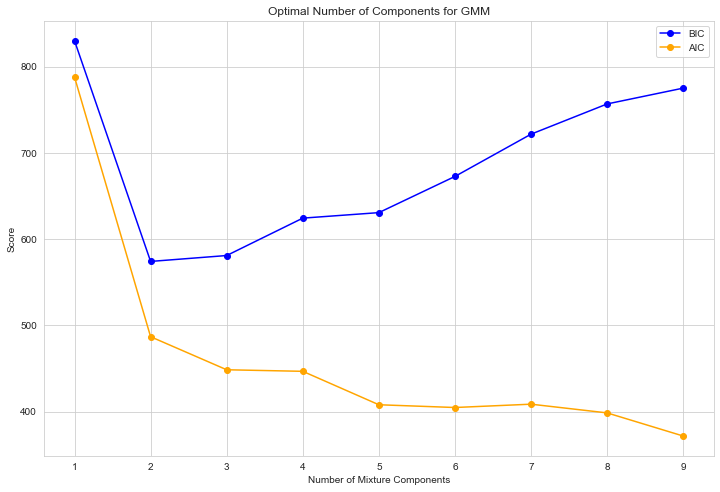

In [13]:
# Set up a range of cluster numbers to try
K = range(1,10) # range(2,11)

# Create empty lists to store the BIC and AIC values
bic_score = []
aic_score = []

# Loop through the range and fit a model
for k in K:
    gm = GaussianMixture(n_components=k, 
                         random_state=123, 
                         n_init=10)
    gm.fit(GMMiris_df)
    
    # Append the BIC and AIC to the respective lists
    bic_score.append(gm.bic(GMMiris_df))
    aic_score.append(gm.aic(GMMiris_df))
    
# Plot the BIC and AIC values together
fig, ax = plt.subplots(figsize=(12,8),nrows=1)
ax.plot(K, bic_score, '-o', color='blue', label = 'BIC')
ax.plot(K, aic_score, '-o', color='orange', label = 'AIC')
ax.set(xlabel='Number of Mixture Components', ylabel='Score')
ax.set_xticks(K)
ax.set_title('Optimal Number of Components for GMM');
plt.legend();

Both AIC and BIC are minimum for three (3) mixture components. Beyond this value, the AIC decreases while the BIC increases. Thus three mixture components will be used to fit the GMM. 

In [14]:
GMMModel = GaussianMixture(n_components=3)
GMMModel.fit(GMMiris_df)

GaussianMixture(n_components=3)

In [15]:
GMMiris_df['GMM']=GMMModel.predict(GMMiris_df)
GMMiris_df['target']=iris['target']

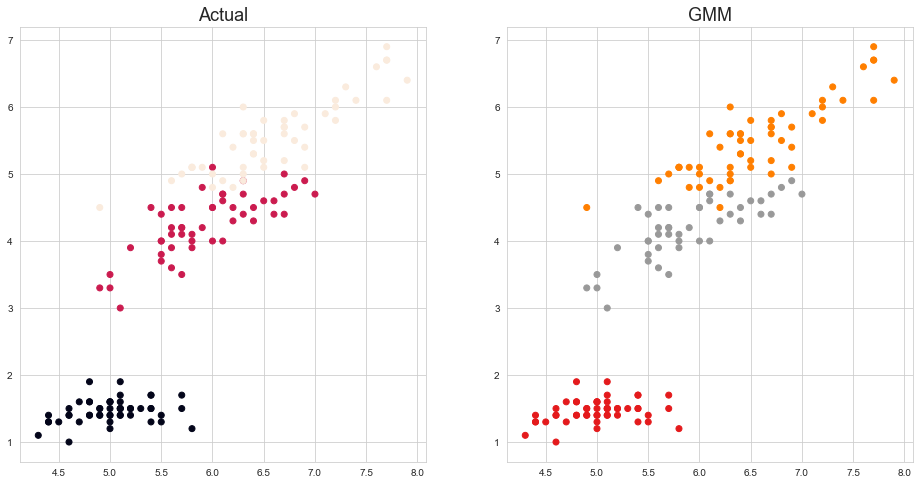

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(GMMiris_df['sepal length (cm)'], GMMiris_df['petal length (cm)'], c=GMMiris_df['target'])
axes[1].scatter(GMMiris_df['sepal length (cm)'], GMMiris_df['petal length (cm)'], c=GMMiris_df['GMM'], cmap=plt.cm.Set1)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('GMM', fontsize=18);

In [17]:
GMMModel.means_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [6.54639415, 2.94946365, 5.48364578, 1.98726565],
       [5.9170732 , 2.77804839, 4.20540364, 1.29848217]])

## K-means  Vs Gaussian Mixture Model

**Adjusted rand index (ARI)**
- K-means and Gaussian Mixture Model clustering results is compared using Adjusted rand index (ARI). 
- The Adjusted rand index uses true cluster assignments to measure the similarity between true and predicted labels.
- The ARI output values range between -1 and 1. A score close to 0.0 indicates random assignments, and a score close to 1 indicates perfectly labeled clusters.

In [18]:
from sklearn.metrics import adjusted_rand_score

### K-means Evaluation

In [20]:
adjusted_rand_score(Kiris_df['target'], Kiris_df['k_means'])

0.7302382722834697

### Gaussian Mixture Model Evaluation

In [19]:
adjusted_rand_score(GMMiris_df['target'], GMMiris_df['GMM'])

0.9038742317748124

# Using a sample of Bitbrains workload data set

[Bitbrains Workload](http://gwa.ewi.tudelft.nl/datasets/gwa-t-12-bitbrains)

Since Experiments were performed using the fastStorage trace in the paper titled `Clustering Cloud Workloads: K-means vs Gaussian Mixture Model`, the fastStorage trace data set will be used. The fastStorage data set consists of 1,250 VMs